# Study packets loss in ad hoc network

In [7]:
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD

# construct the backbone of Bayesian model
model = BayesianModel([('M', 'D'), ('E', 'D')])

# Set CPD of the two top nodes M and E

# ad hoc packet loss because of mallisiouc behaviour（0：not drop，1: drop）
cpd_m = TabularCPD(variable='M', variable_card=2, values=[[0.2, 0.8]])  

# ad hoc packet loss because of network environment（0：not loss，1: loss）
cpd_e = TabularCPD(variable='E', variable_card=2, values=[[0.9, 0.1]]) 


# ad hoc node packet loss behaviour being monitored (0：not loss, 1：loss) 
cpd_d = TabularCPD(variable='D', variable_card=2,
                   values=[[0, 0.4, 0.2, 1],
                           [1, 0.6, 0.8, 0]],
                   evidence=['M', 'E'],
                   evidence_card=[2,2])

# add CPDs into the bayesian network
model.add_cpds(cpd_m, cpd_e, cpd_d)

In [8]:
# 查看道德图
model.get_independencies()

(M _|_ E)
(E _|_ M)

In [9]:
# 验证模型数据的正确性
print(u"验证模型数据的正确性:", model.check_model())

验证模型数据的正确性: True


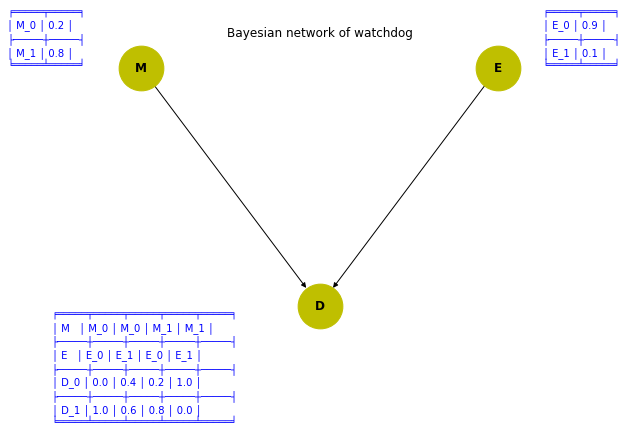

In [10]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

# 绘制贝叶斯图(节点+依赖关系)
nx.draw(model, with_labels=True, node_size=2000, font_weight='bold', node_color='y', \
        pos={"D":[4,5],"M":[2,7],"E":[6,7]})
plt.text(0.5,7,model.get_cpds("M"), fontsize=10, color='b')
plt.text(6.5,7,model.get_cpds("E"), fontsize=10, color='b')
plt.text(1,4,model.get_cpds("D"), fontsize=10, color='b')
plt.title("Bayesian network of watchdog")
plt.show()

In [11]:
from pgmpy.inference import VariableElimination
infer = VariableElimination(model)

# 因果推理/预测

# M的先验概率
q = infer.query(variables=['M'], evidence={})
print(q['M'])

# E的先验概率
q = infer.query(variables=['E'], evidence={})
print(q['E'])

# M的先验概率
q = infer.query(variables=['D'], evidence={})
print(q['D'])

╒═════╤══════════╕
│ M   │   phi(M) │
╞═════╪══════════╡
│ M_0 │   0.2000 │
├─────┼──────────┤
│ M_1 │   0.8000 │
╘═════╧══════════╛
╒═════╤══════════╕
│ E   │   phi(E) │
╞═════╪══════════╡
│ E_0 │   0.9000 │
├─────┼──────────┤
│ E_1 │   0.1000 │
╘═════╧══════════╛
╒═════╤══════════╕
│ D   │   phi(D) │
╞═════╪══════════╡
│ D_0 │   0.2320 │
├─────┼──────────┤
│ D_1 │   0.7680 │
╘═════╧══════════╛


In [12]:
# 证据推论/解释

q = infer.query(variables=['M'], evidence={'D': 1, 'E': 0})
print(q['M'])


q = infer.query(variables=['M'], evidence={'D': 1, 'E': 1})
print(q['M'])

╒═════╤══════════╕
│ M   │   phi(M) │
╞═════╪══════════╡
│ M_0 │   0.2381 │
├─────┼──────────┤
│ M_1 │   0.7619 │
╘═════╧══════════╛
╒═════╤══════════╕
│ M   │   phi(M) │
╞═════╪══════════╡
│ M_0 │   1.0000 │
├─────┼──────────┤
│ M_1 │   0.0000 │
╘═════╧══════════╛
